对单张图像，调用mmocr，进行文本内容识别和文字区域检测，输出OCR结果图像。

同济子豪兄 2022-1-6

# 切换工作目录到主目录

In [1]:
import os
os.chdir('../')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'tutorials-1224',
 '__MACOSX',
 '.eggs']

# 导入工具包

In [2]:
# 导入pytorch
import torch, torchvision

# 导入mmcv和mmdet
import mmcv
import mmdet

# 导入mmocr
# import mmocr

# from mmcv.ops import get_compiling_cuda_version, get_compiler_version

In [3]:
# 导入opencv-python
import cv2

# 导入可视化工具包matplotlib，并让绘制的图像嵌入在notebook中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数
def look_img_path(img_path):
    '''输入图像路径，可视化图像'''
    '''opencv读入图像，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数
def look_img(img):
    '''输入图像array，可视化图像'''
    '''输入array，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 可视化某张测试图像

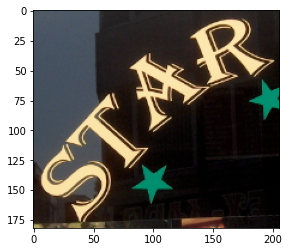

In [4]:
look_img_path('demo/demo_text_recog.jpg')

# 导入OCR文本识别模型

In [11]:
from mmocr.utils.ocr import MMOCR

In [13]:
mmocr = MMOCR(det=None, recog='SAR', device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/featurize/work/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


载入mmocr模型，det指定文本检测模型，recog指定文本识别模型，device指定运算设备。

In [14]:
result = mmocr.readtext('demo/demo_text_recog.jpg', output='outputs/demo_text_recog_pred.jpg')

调用mmocr的readtext函数执行OCR推断，指定输入和输出图像路径。

返回的result中包含识别出的文字和置信度。

In [15]:
result

[{'text': 'STAR', 'score': 0.9664111584424973}]

生成的图像中包含原图和文本识别结果。

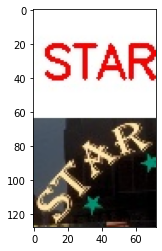

In [16]:
look_img_path('outputs/demo_text_recog_pred.jpg')

# 换一张图像试试看

In [18]:
os.listdir('tutorials/img')

['1-out.jpg',
 'python-logo.png',
 '1-mosaic.jpg',
 '4.jpg',
 '.ipynb_checkpoints',
 '4-out.jpg',
 'python-out.jpg',
 '2.jpg',
 '3.jpg',
 '1.jpg']

In [19]:
mmocr.readtext('tutorials/img/python-logo.png', output='tutorials/img/python-out.jpg')

[{'text': 'python', 'score': 0.9550419449806213}]

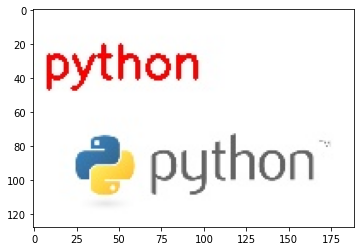

In [20]:
look_img_path('tutorials/img/python-out.jpg')

# 文本检测

In [21]:
mmocr = MMOCR(det='TextSnake', recog=None, device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth" to /home/featurize/.cache/torch/hub/checkpoints/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


  0%|          | 0.00/139M [00:00<?, ?B/s]

In [22]:
result = mmocr.readtext('demo/demo_text_det.jpg', output='outputs/demo_text_det_pred.jpg')

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/featurize/work/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)


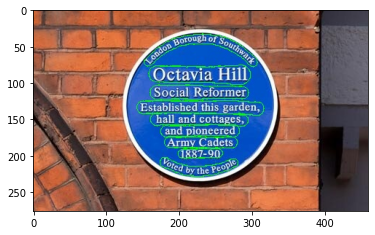

In [23]:
look_img_path('outputs/demo_text_det_pred.jpg')

In [24]:
# 文本区域个数
len(result[0]['boundary_result'])

9

In [25]:
# 索引为1的区域
len(result[0]['boundary_result'][1])

415

In [26]:
# 列表最后一位为文本区域置信度
result[0]['boundary_result'][0][-1]

0.9489857829677872